# Classification : Bank Subscription

This is Sklearn programming for a classification problem. Download this [Bank Marketing](https://www.kaggle.com/datasets/tunguz/bank-marketing-data-set) dataset at Kaggle and use the data in `bank.csv` for faster iterations.

In [ ]:
# set up access to data
import os
from google.colab import drive
mountpoint = os.path.join(os.path.abspath('.'), 'drive')
drive.mount(mountpoint, force_remount=True)
classroom = os.path.join(mountpoint, 'MyDrive/Classroom/UE10 Machine Learning for Finance using Python M2 Finance FIT & FiRE 2023-2024/Classification/')

Mounted at /content/drive


In [ ]:
datafile = os.path.join(classroom, 'bank-full.csv') # bank.csv | bank-full.csv

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv(datafile, delimiter=';')

In [ ]:
# look at metadata
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [ ]:
# look at some data
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [ ]:
# look at "all" the data
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [ ]:
# dataset is not balanced, make sure to tell the model
df['y'].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

In [ ]:
# look at non-numerical data : drop? one-hot encode? encode to numerical scale?
cols = df.select_dtypes(['object']).columns
for col in cols: print(col, df[col].unique())

job ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
marital ['married' 'single' 'divorced']
education ['tertiary' 'secondary' 'unknown' 'primary']
default ['no' 'yes']
housing ['yes' 'no']
loan ['no' 'yes']
contact ['unknown' 'cellular' 'telephone']
month ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
poutcome ['unknown' 'failure' 'other' 'success']
y ['no' 'yes']


In [ ]:
df.drop(['day', 'month', 'duration', 'campaign', 'pdays'], axis=1, inplace=True)

# if we were to keep pdays, gotta fix the dataset
# df.loc[df['pdays'] == -1, 'pdays'] = 999

In [ ]:
# handle "null" values
unknown = ('unknown', 'other')
df.isin(unknown).sum()

age              0
job            288
marital          0
education     1857
default          0
balance          0
housing          0
loan             0
contact      13020
previous         0
poutcome     38799
y                0
dtype: int64

In [ ]:
# drop garbage columns then rows with "null" values
df.drop(['contact', 'poutcome'], axis=1, inplace=True)
df = df[~df.isin(unknown).any(axis=1)]
df.isin(unknown).sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
previous     0
y            0
dtype: int64

In [ ]:
# one-hot encode yes/no columns in place
df.replace({'yes':1, 'no':0}, inplace=True)

<ipython-input-50-cb6679b82cbe>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.replace({'yes':1, 'no':0}, inplace=True)


In [ ]:
# one-hot encode remaining non-numerical columns
X = df.copy()
X = pd.get_dummies(X)
X

,age,default,balance,housing,loan,previous,y,job_admin.,job_blue-collar,job_entrepreneur,...,job_services,job_student,job_technician,job_unemployed,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary
0,58,0,2143,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
1,44,0,29,1,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,1,0
2,33,0,2,1,1,0,0,0,0,1,...,0,0,0,0,0,1,0,0,1,0
5,35,0,231,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
6,28,0,447,1,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,0,825,0,0,0,1,0,0,0,...,0,0,1,0,0,1,0,0,0,1
45207,71,0,1729,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,1,0,0
45208,72,0,5715,0,0,3,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
45209,57,0,668,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0


In [ ]:
# separate input and target variable, split train and test datasets, scale the data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

y = X.pop('y')

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# let's start with a very simple model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='liblinear', class_weight='balanced', random_state=42) # try 'newton-cg' hyper-param
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.67      0.78      9562
           1       0.20      0.63      0.30      1237

    accuracy                           0.67     10799
   macro avg       0.57      0.65      0.54     10799
weighted avg       0.85      0.67      0.73     10799



array([[-0.00106918, -0.04272894,  0.08168561, -0.35938525, -0.18243539,
         0.34396047,  0.04469751, -0.04696831, -0.04110774, -0.03054939,
        -0.02031655,  0.16609795, -0.0089299 , -0.03651479,  0.07926369,
        -0.03562362,  0.03027326,  0.0104731 , -0.09521327,  0.09609115,
        -0.10329659, -0.02120811,  0.10445447]])

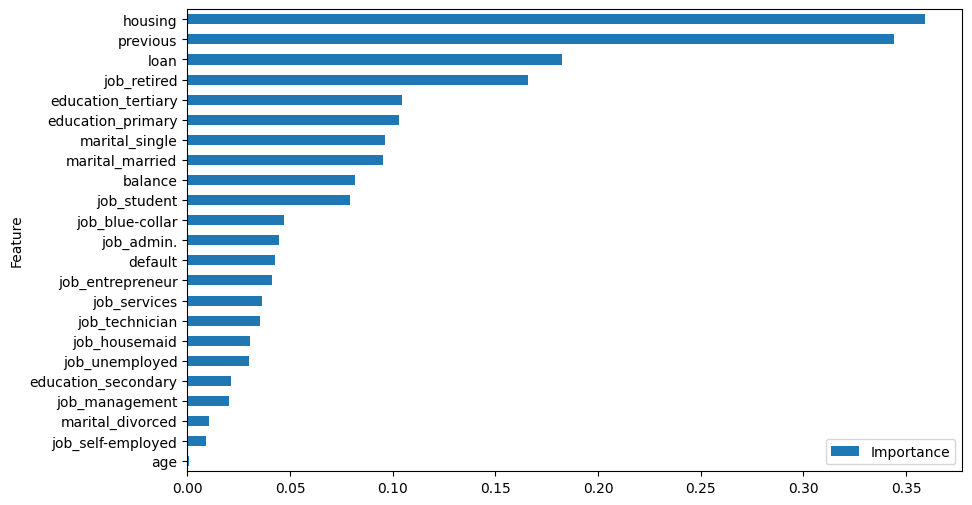

In [ ]:
# model explainability
importance = pd.DataFrame({'Feature': X.columns, 'Importance': np.abs(model.coef_[0])})
importance = importance.sort_values('Importance', ascending=True)
importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6))
model.coef_

In [ ]:
# on to a more sophisticated model
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(class_weight='balanced', random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93      9562
           1       0.35      0.15      0.21      1237

    accuracy                           0.87     10799
   macro avg       0.62      0.56      0.57     10799
weighted avg       0.83      0.87      0.85     10799



array([-1.85202334e-05, -5.55607001e-05,  1.98166497e-03,  7.35253264e-03,
        1.54643949e-03,  3.39846282e-03, -2.45393092e-03, -2.50949162e-03,
       -9.90832484e-04, -2.87063617e-04, -4.90786184e-03, -1.74090194e-03,
       -4.44485601e-04, -1.57421984e-03, -1.75016205e-03, -3.90776924e-03,
       -2.96323734e-04, -3.05583850e-03, -6.95434762e-03, -6.21353829e-03,
       -2.04648579e-03, -7.17659043e-03, -6.94508751e-03])

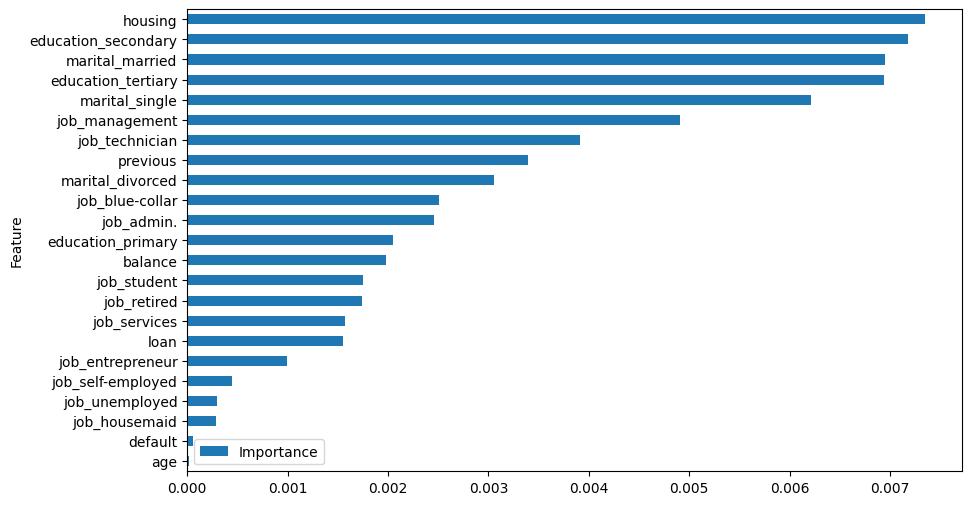

In [ ]:
# model explainability
from sklearn.inspection import permutation_importance

permutation = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2)
importance = pd.DataFrame({'Feature': X.columns, 'Importance': np.abs(permutation.importances_mean)})
importance = importance.sort_values('Importance', ascending=True)
importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6))
permutation.importances_mean